In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from create_cluster import get_config
config = get_config()

import psycopg2 
# from sqlalchemy import create_engine 

In [3]:
# establish connection with the database 
from sql_queries import create_connection

In [4]:
cur, conn = create_connection()


In [5]:
sql = "select * from songs;"
df_songs = pd.read_sql_query(sql, conn)

C:\Users\zzbra\AppData\Local\Temp\ipykernel_16516\2888160293.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_songs = pd.read_sql_query(sql, conn)


In [6]:
df_songs.head()

,song_id,title,artist_id,year,duration
0,SOFSOCN12A8C143F5D,Face the Ashes,ARXR32B1187FB57099,2007,209.606079
1,SOHKNRJ12A6701D1F8,Drop of Rain,AR10USD1187B99F3F1,0,189.570160
2,SOQPWCR12A6D4FB2A3,A Poor Recipe For Civic Cohesion,AR73AIO1187B9AD57B,2005,118.073021
3,SOIGHOD12A8C13B5A1,Indian Angel,ARY589G1187B9A9F4E,2004,171.571793
4,SOFRDWL12A58A7CEF7,Hit Da Scene,AR9Q9YC1187FB5609B,0,252.943222


In [7]:
sql = "select * from songplay;"
df_songplays = pd.read_sql_query(sql, conn)
df_songplays.columns

C:\Users\zzbra\AppData\Local\Temp\ipykernel_16516\1676052027.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_songplays = pd.read_sql_query(sql, conn)


Index(['songplay_id', 'start_time', 'user_id', 'level', 'song_id', 'artist_id',
       'session_id', 'location', 'user_agent'],
      dtype='object')

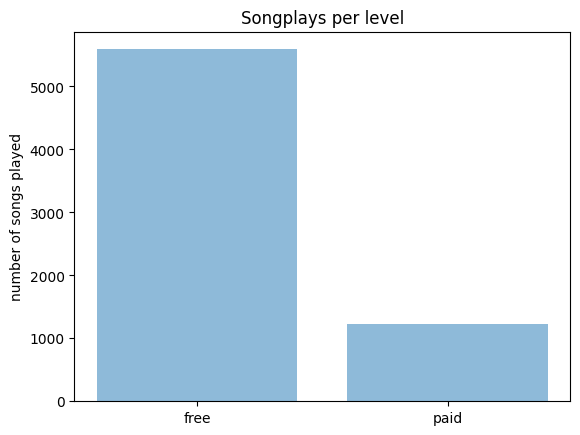

In [8]:
df_songplays['level'].value_counts()
level = ('free', 'paid')
y_pos = np.arange(len(level))
level_count = df_songplays['level'].value_counts()

plt.bar(y_pos, level_count, align='center', alpha=0.5)
plt.xticks(y_pos, level)
plt.ylabel('number of songs played')
plt.title('Songplays per level')
plt.savefig("Songplays_per_level", bbox_inches='tight')
plt.show()

In [9]:
query = """
select users.gender || ', ' || users.level as gender_level,
       count(songplay.songplay_id)
  from songplay
  left join users
    on songplay.user_id = users.user_id
 group by users.gender, users.level
 order by users.gender, users.level;
"""

In [10]:
# sql_df = pd.read_sql( 
#     query, 
#     con=engine 
# ) 

C:\Users\zzbra\AppData\Local\Temp\ipykernel_16516\549315127.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn).plot(kind="barh", x="gender_level", legend=None, ax=ax, zorder=2)


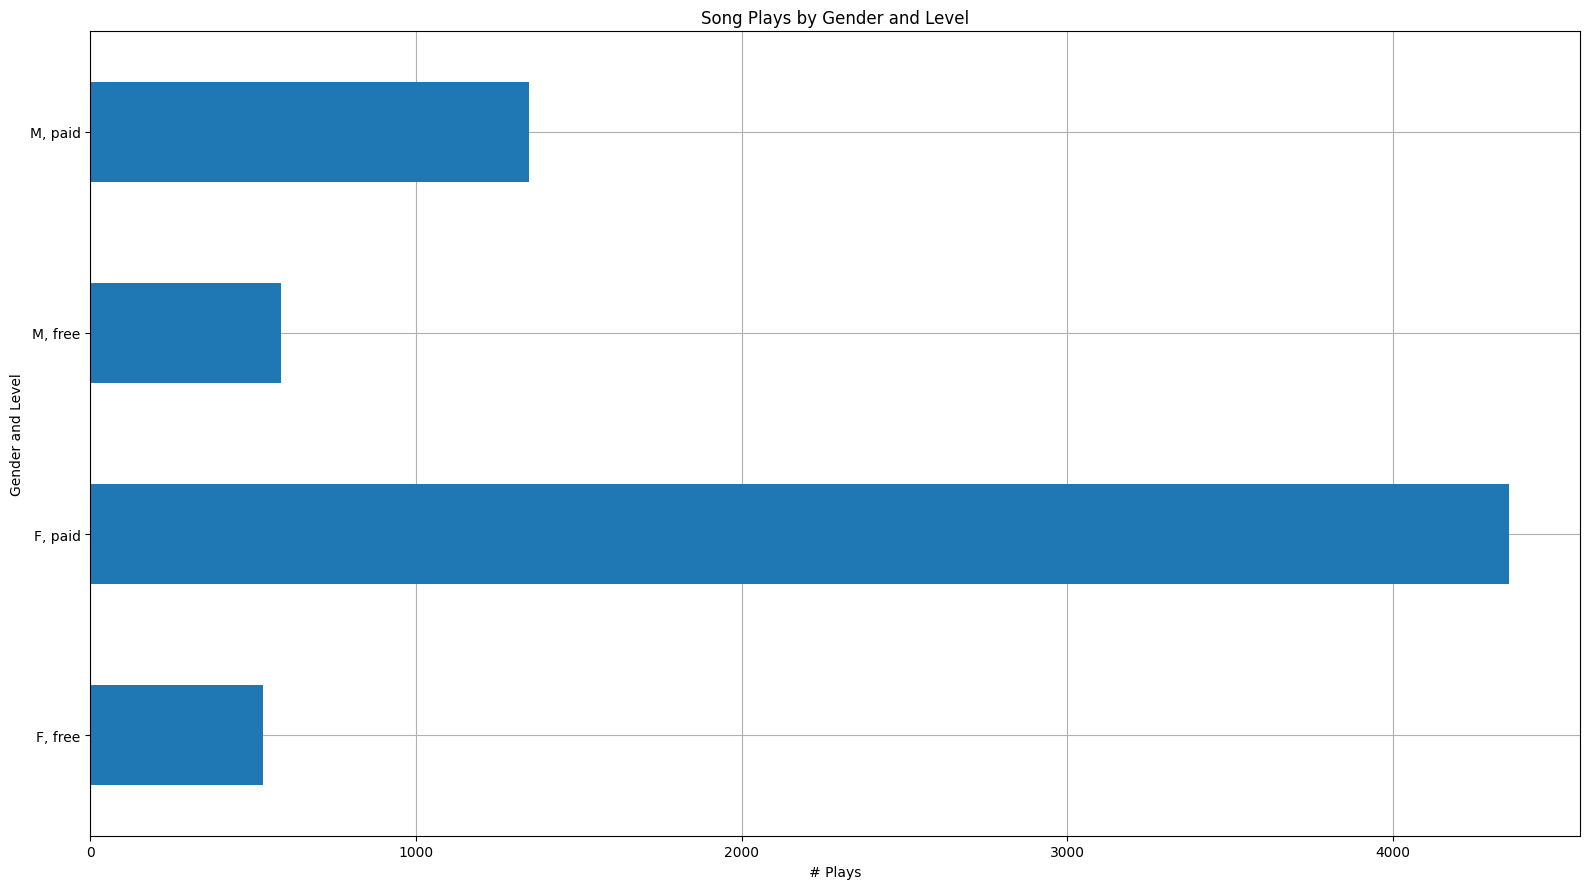

In [11]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="gender_level", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("# Plays")
ax.set_ylabel("Gender and Level")
ax.set_title("Song Plays by Gender and Level")

plt.tight_layout()
plt.savefig("./plots/songplays_by_gender_and_level.png", dpi=120)

In [12]:
query=    """
  SELECT sp.song_id, s.title, count(*) AS cnt 
    FROM songplay sp
    JOIN songs s
      ON sp.song_id = s.song_id
GROUP BY 1, 2
ORDER BY 3 DESC
   LIMIT 10;
    """

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="gender_level", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("# Plays")
ax.set_ylabel("Gender and Level")
ax.set_title("Song Plays by Gender and Level")

plt.tight_layout()
plt.savefig("./plots/songplays_by_gender_and_level.png", dpi=120)

In [ ]:
query = (
    """
`   SELECT sp.song_id, s.title, count(*) AS cnt 
    FROM songplay sp
    JOIN songs s
      ON sp.song_id = s.song_id
GROUP BY 1, 2
ORDER BY 3 DESC
   LIMIT 10;
    """
)

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="gender_level", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("# Plays")
ax.set_ylabel("Gender and Level")
ax.set_title("Song Plays by Gender and Level")

plt.tight_layout()
plt.savefig("./plots/songplays_by_gender_and_level.png", dpi=120)

In [ ]:
query = (

    """
`   SELECT sp.song_id, s.title, count(*) AS cnt 
    FROM songplay sp
    JOIN songs s
      ON sp.song_id = s.song_id
GROUP BY 1, 2
ORDER BY 3 DESC
   LIMIT 10;
    """
)

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="gender_level", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("# Plays")
ax.set_ylabel("Gender and Level")
ax.set_title("Song Plays by Gender and Level")

plt.tight_layout()
plt.savefig("./plots/songplays_by_gender_and_level.png", dpi=120)

In [ ]:
query = (
    """
  SELECT CASE
           WHEN t.hour BETWEEN 2 AND 8  THEN '2~8'
           WHEN t.hour BETWEEN 9 AND 12 THEN '9~12'
           WHEN t.hour BETWEEN 13 AND 18 THEN '13~18'
           WHEN t.hour BETWEEN 19 AND 22 THEN '19~22'
           ELSE '23~24, 0~2'
         END AS play_time, 
         count(*) AS cnt
    FROM songplay sp
    JOIN time t
      ON sp.start_time = t.start_time
GROUP BY 1
ORDER BY 2 DESC;
    """
)